In [1]:
# Your first function should be defined in this cell. Each subsequent function will entered into a new cell. 

def get_grades_data():
    '''Reads the input csv file containing details of the grades of 20 semesters and writes the data into appropriate data structure.'''
    import pandas as pd
    
    #INITIALIZATION
    FILE_PATH = '/USERS/CIS5357/ASSIGNMENTS/'                                   #defining the file path and file name 
    GRADES_CSV_FILE_NAME = 'grades.csv'
    
    #PROCESS
    df_grades = pd.read_csv(FILE_PATH + GRADES_CSV_FILE_NAME)                   #reading the csv file
    
    #OUTPUT
    return df_grades                                                            #returns the dataframe with data of csv file

In [2]:
def process_stats(df_grades):
    '''Queries the grades data to get the statistics for the specified letter grade assigned over the past 20 semesters. Also calls print_stats function to print the required output to the console.'''
    
    #INITIALIZATION
    LETTER_GRADES_LIST = ['A','B','C']                                         #defining the list of valid grades
    grade_total_occurrences = 0                                                #initializing other required values
    rounded_grade_average_occurrences = 0.0
    rounded_grade_median = 0.0
    grade_highest_occurrences = 0
    grade_lowest_occurrences = 0
    
    #INPUT
    input_letter_grade = input(f'Please enter the letter grade for which the statistics need to be displayed: ')
    
    #PROCESS
    if input_letter_grade in LETTER_GRADES_LIST:                               #checking if the input grade is valid
        df_input_grade = df_grades[input_letter_grade]                         #generating a dataframe with required letter grade column
        
        grade_total_occurrences = df_input_grade.sum()                         #calling sum() function to get the total occurrences
        
        grade_average_occurrences = df_input_grade.mean()                      #calling mean() function to get the average of occurrences
        rounded_grade_average_occurrences = round(grade_average_occurrences,1) #rounding off the average to 1 decimal place
        
        grade_median = df_input_grade.median()                                 #calling median() function to obtain the median of occurrences
        rounded_grade_median = round(grade_median,1)                           #rounding off the median to 1 decimal place 
        
        grade_highest_occurrences = df_input_grade.max()                       #calling max() function to get the highest value
            
        grade_lowest_occurrences = df_input_grade.min()                        #calling min() function to get the lowest value
        
        #OUTPUT
        #calling print_stats function to print the required output
        print_stats(input_letter_grade, grade_total_occurrences, rounded_grade_average_occurrences, rounded_grade_median, grade_highest_occurrences, grade_lowest_occurrences)
    else:
        #OUTPUT
        print(f'The entered grade is invalid. The statistics for this grade cannot be displayed.\nPossible values for grade are A,B,C.\n\n')

In [3]:
def print_stats(input_letter_grade, grade_total_occurrences, rounded_grade_average_occurrences, rounded_grade_median, grade_highest_occurrences, grade_lowest_occurrences):
    '''Prints the statistics for the specified letter grade assigned over the past 20 semesters.'''
    #OUTPUT
    print(f'\nStatistics for the letter grade {input_letter_grade}\n')
    print(f'The total number of times the letter grade {input_letter_grade} has been assigned\t\t\t:{grade_total_occurrences:>6d}')
    print(f'Average count of the number of times the letter grade {input_letter_grade} has been assigned\t:{rounded_grade_average_occurrences:>8.1f}')
    print(f'Median number of times the letter grade {input_letter_grade} has been assigned\t\t\t:{rounded_grade_median:>8.1f}')
    print(f'The highest number of times the letter grade {input_letter_grade} has been assigned\t\t:{grade_highest_occurrences:>6d}')
    print(f'The lowest number of times the letter grade {input_letter_grade} has been assigned\t\t\t:{grade_lowest_occurrences:>6d}')
    print(f'\n\n')

In [4]:
def split_dataframe(df_grades):
    '''Splits the master dataframe into sub dataframes as per requirement.'''
    #PROCESS
    df_A = df_grades[['Semester','A']]
    df_B = df_grades[['Semester','B']]
    df_C = df_grades[['Semester','C']]
    
    #OUTPUT
    return df_A, df_B, df_C

In [5]:
def horizontal_graphplot(df_grades, df_A, df_B, df_C):
    '''Generates charts in horizontal manner for displaying trend in assigning each letter grade.'''
    import matplotlib                                                          #importing the required libraries
    import matplotlib.pyplot as plt
    %matplotlib inline
    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    
    plt.close('all')                                                           #closing all figures that may be open to recapture memory
    plt.style.use('seaborn')
    
    fig1 = plt.figure(figsize= (24,6), dpi=120)
    fig1.suptitle('Trend of Grades across Semesters (Horizontal)', fontsize=20)#title of the graph
    ax1 = fig1.add_subplot(1,3,1)                                              #plotting the subgraphs
    ax2 = fig1.add_subplot(1,3,2)
    ax3 = fig1.add_subplot(1,3,3)

    ax1.grid(True, which='major', linewidth=1, color='white')                  #setting the parameters for the grade A data
    ax1.set_title('Grade A', fontsize=15)
    ax1.set_xlabel('Semester', fontsize=12)
    ax1.set_ylabel('# of A grades', fontsize=12)
    ax1.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax1.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax1.minorticks_on
    ax1_maxyvalue = df_A['A'].max()
    ax1.set_ylim(0,ax1_maxyvalue+4)
    ax1.tick_params(axis='y', direction='out', length=4, labelsize=10)
    ax1.tick_params(axis='x', direction='out', length=4, rotation=75, labelsize=10)
    ax1.plot(df_A['Semester'], df_A['A'], color='red')
    
    ax2.grid(True, which='major', linewidth=1, color='white')                  #setting the parameters for the grade B data
    ax2.set_title('Grade B', fontsize=15)
    ax2.set_xlabel('Semester', fontsize=12)
    ax2.set_ylabel('# of B grades', fontsize=12)
    ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax2.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax2.minorticks_on
    ax2_maxyvalue = df_B['B'].max()
    ax2.set_ylim(0,ax2_maxyvalue+4)
    ax2.tick_params(axis='y', direction='out', length=4, labelsize=10)
    ax2.tick_params(axis='x', direction='out', length=4, rotation=75, labelsize=10)
    ax2.plot(df_B['Semester'], df_B['B'], color='magenta')
    
    ax3.grid(True, which='major', linewidth=1, color='white')                  #setting the parameters for the grade C data
    ax3.set_title('Grade C', fontsize=15)
    ax3.set_ylabel('# of C grades', fontsize=12)
    ax3.set_xlabel('Semester', fontsize=12)
    ax3.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax3.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax3.minorticks_on
    ax3_maxyvalue = df_C['C'].max()
    ax3.set_ylim(0,ax3_maxyvalue+4)
    ax3.tick_params(axis='y', direction='out', length=4, labelsize=10)
    ax3.tick_params(axis='x', direction='out', length=4, rotation=75, labelsize=10)
    ax3.plot(df_C['Semester'], df_C['C'], color='brown')

    plt.show()

In [6]:
def vertical_graphplot(df_grades, df_A, df_B, df_C):
    '''Generates charts in vertical manner for displaying trend in assigning each letter grade.'''
    import matplotlib                                                          #importing the required libraries
    import matplotlib.pyplot as plt
    %matplotlib inline
    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


    plt.close('all')                                                           #closing all figures that may be open to recapture memory
    plt.style.use('seaborn')
    
    fig2 = plt.figure(figsize= (24,90), dpi=120)
    fig2, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(24,30), dpi=120)        #plotting the graph
    fig2.suptitle('Trend of Grades across Semesters (Vertical)', fontsize=20)  #title of the graph

    ax1.grid(True, which='major', linewidth=1, color='white')                  #setting the parameters for the grade A data
    ax1.set_title('Grade A', fontsize=15)
    ax1.set_xlabel('Semester', fontsize=12)
    ax1.set_ylabel('# of A grades', fontsize=12)
    ax1.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax1.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax1.minorticks_on
    ax1_maxyvalue = df_A['A'].max()
    ax1.set_ylim(0,ax1_maxyvalue+4)
    ax1.tick_params(axis='y', direction='out', length=4, labelsize=12)
    ax1.tick_params(axis='x', direction='out', length=4, rotation=75, labelsize=12)
    ax1.plot(df_A['Semester'], df_A['A'], color='red')
    
    ax2.grid(True, which='major', linewidth=1, color='white')                  #setting the parameters for the grade B data
    ax2.set_title('Grade B', fontsize=15)
    ax2.set_xlabel('Semester', fontsize=12)
    ax2.set_ylabel('# of B grades', fontsize=12)
    ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax2.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax2.minorticks_on
    ax2_maxyvalue = df_B['B'].max()
    ax2.set_ylim(0,ax2_maxyvalue+4)
    ax2.tick_params(axis='y', direction='out', length=4, labelsize=12)
    ax2.tick_params(axis='x', direction='out', length=4, rotation=75, labelsize=12)
    ax2.plot(df_B['Semester'], df_B['B'], color='magenta')
    
    ax3.grid(True, which='major', linewidth=1, color='white')                  #setting the parameters for the grade C data
    ax3.set_title('Grade C', fontsize=15)
    ax3.set_ylabel('# of C grades', fontsize=12)
    ax3.set_xlabel('Semester', fontsize=12)
    ax3.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax3.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax3.minorticks_on
    ax3_maxyvalue = df_C['C'].max()
    ax3.set_ylim(0,ax3_maxyvalue+4)
    ax3.tick_params(axis='y', direction='out', length=4, labelsize=12)
    ax3.tick_params(axis='x', direction='out', length=4, rotation=75, labelsize=12)
    ax3.plot(df_C['Semester'], df_C['C'], color='brown')

    plt.show()

In [7]:
def generate_all_grade_chart(df_grades, df_A, df_B, df_C):
    '''Generates the visualization chart for trend in each of the three letter grades in the same chart.'''
    import matplotlib                                                          #importing the required libraries
    import matplotlib.pyplot as plt
    %matplotlib inline
    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

    plt.close('all')                                                           #closing all figures that may be open to recapture memory
    plt.style.use('seaborn')
    
    fig3 = plt.figure(dpi=120)
    fig3, (ax1) = plt.subplots(1,1, figsize=(30,8), sharey=True)               #plotting the graph

    ax1.set_title('Trend of Grades across Semesters', fontsize =20)            #setting the parameters required for the graph
    ax1.set_xlabel('Semester', fontsize=16)
    ax1.set_ylabel('# of Grades', fontsize=16)
    #ax1.xaxis.set_minor_locator(AutoMinorLocator(1))
    ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax1.minorticks_on
    
    # set up x-axis
    xaxis = []       # list to hold semester values #
    for val in range(0, len(df_grades['Semester']),1):  
        temp = df_grades['Semester'].iloc[val]
        xaxis.append(temp)
    length_of_x_values = len(xaxis)
    #ax1.set_xlim(-1, length_of_x_values)
    
    max_yvalue = max(df_A['A'].max(), df_B['B'].max(), df_C['C'].max())
    ax1.set_ylim(0,max_yvalue+5)
    
    ax1.tick_params(axis='y', direction='out', which= 'both', length=4, labelsize=15)
    ax1.tick_params(axis='x', direction='out', which= 'both', length=4, labelsize=15, rotation=75)

    ax1.grid(True, which='both', linewidth=2, color='white')
    ax1.plot(xaxis, df_A['A'], label='A grade', color='red', marker='D', markersize=10)  # provide a label/color for legend
    ax1.plot(xaxis, df_B['B'], label='B grade', color='blue', marker='d', markersize=10, linestyle = '-.')
    ax1.plot(xaxis, df_C['C'], label='C grade', color='green', marker='o', markersize=10, linestyle='dotted')
    ax1.legend(loc='upper right')  # set the position of the legend and then display
    plt.show()

In [8]:
def main():
    '''The main programs calls all the functions required for execution of the logic'''
    df_grades = get_grades_data()                                              #calling get_grades_data() function
    process_stats(df_grades)                                                   #calling get_stats() function
    
    df_A, df_B, df_C = split_dataframe(df_grades)                              #calling split_dataframe() function
    horizontal_graphplot(df_grades, df_A, df_B, df_C)                          #calling horizontal_graphplot() function
    vertical_graphplot(df_grades, df_A, df_B, df_C)                            #calling vertical_graphplot() function
    generate_all_grade_chart(df_grades, df_A, df_B, df_C)                      #calling generate_all_grade_chart() function

Please enter the letter grade for which the statistics need to be displayed:  C



Statistics for the letter grade C

The total number of times the letter grade C has been assigned			:   463
Average count of the number of times the letter grade C has been assigned	:    23.1
Median number of times the letter grade C has been assigned			:    23.5
The highest number of times the letter grade C has been assigned		:    30
The lowest number of times the letter grade C has been assigned			:    16





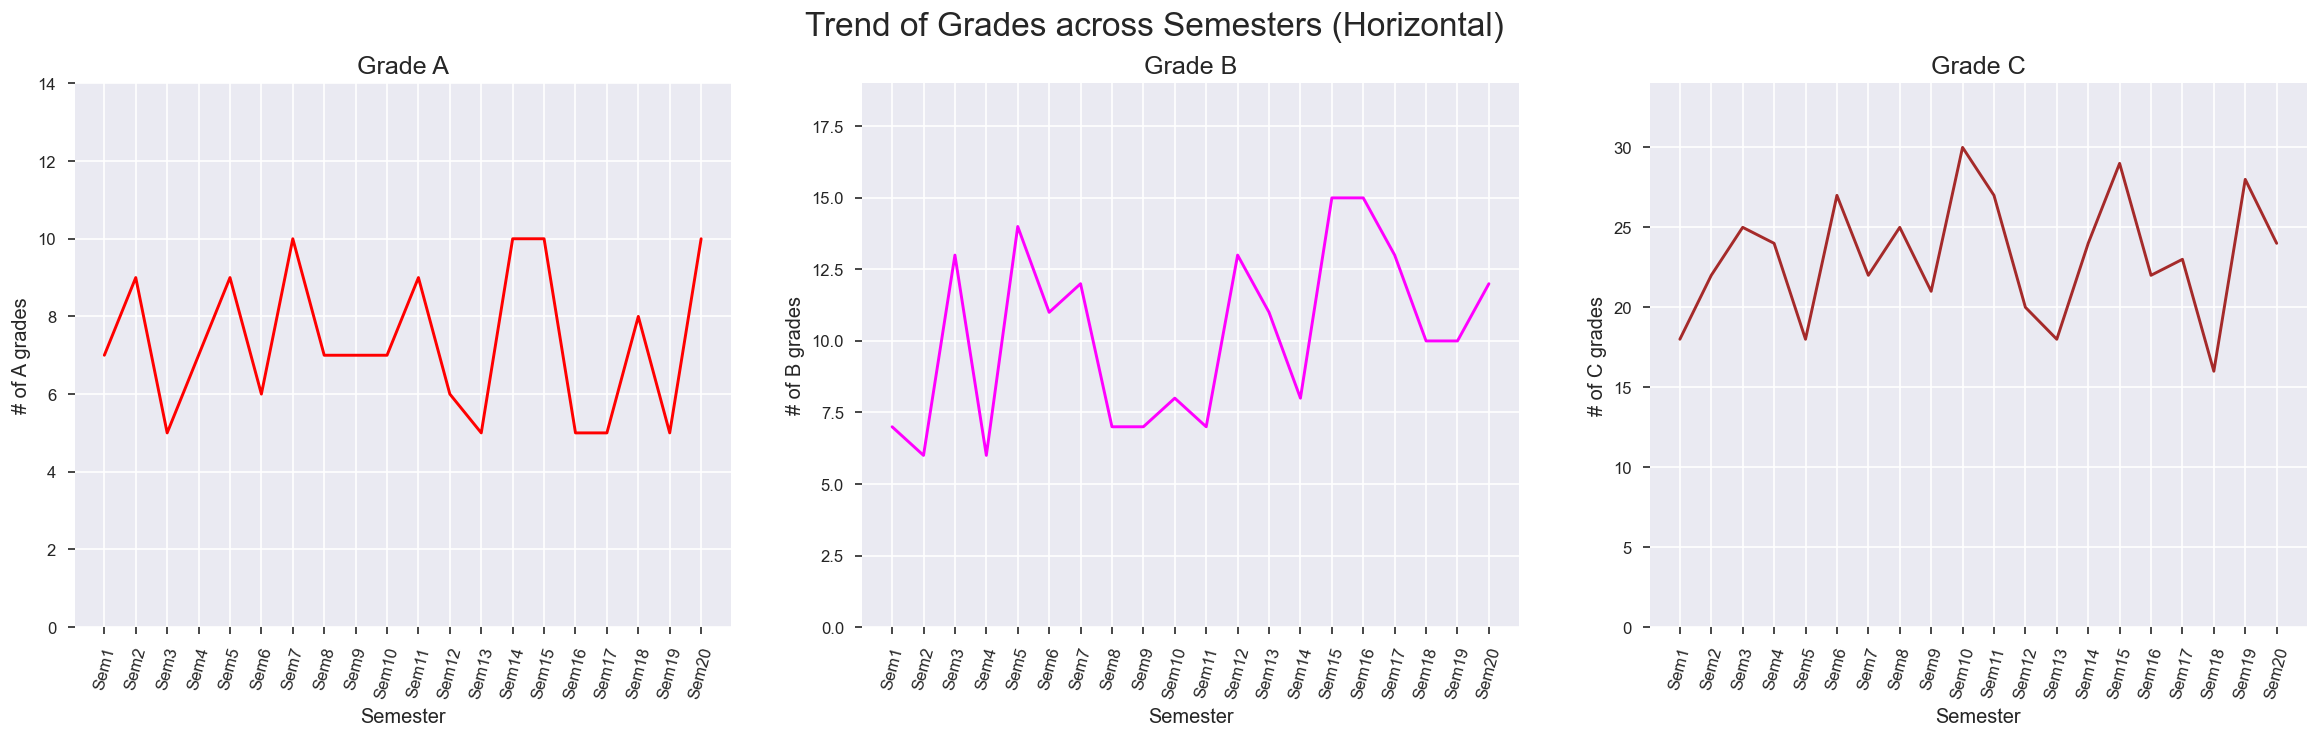

<Figure size 2880x10800 with 0 Axes>

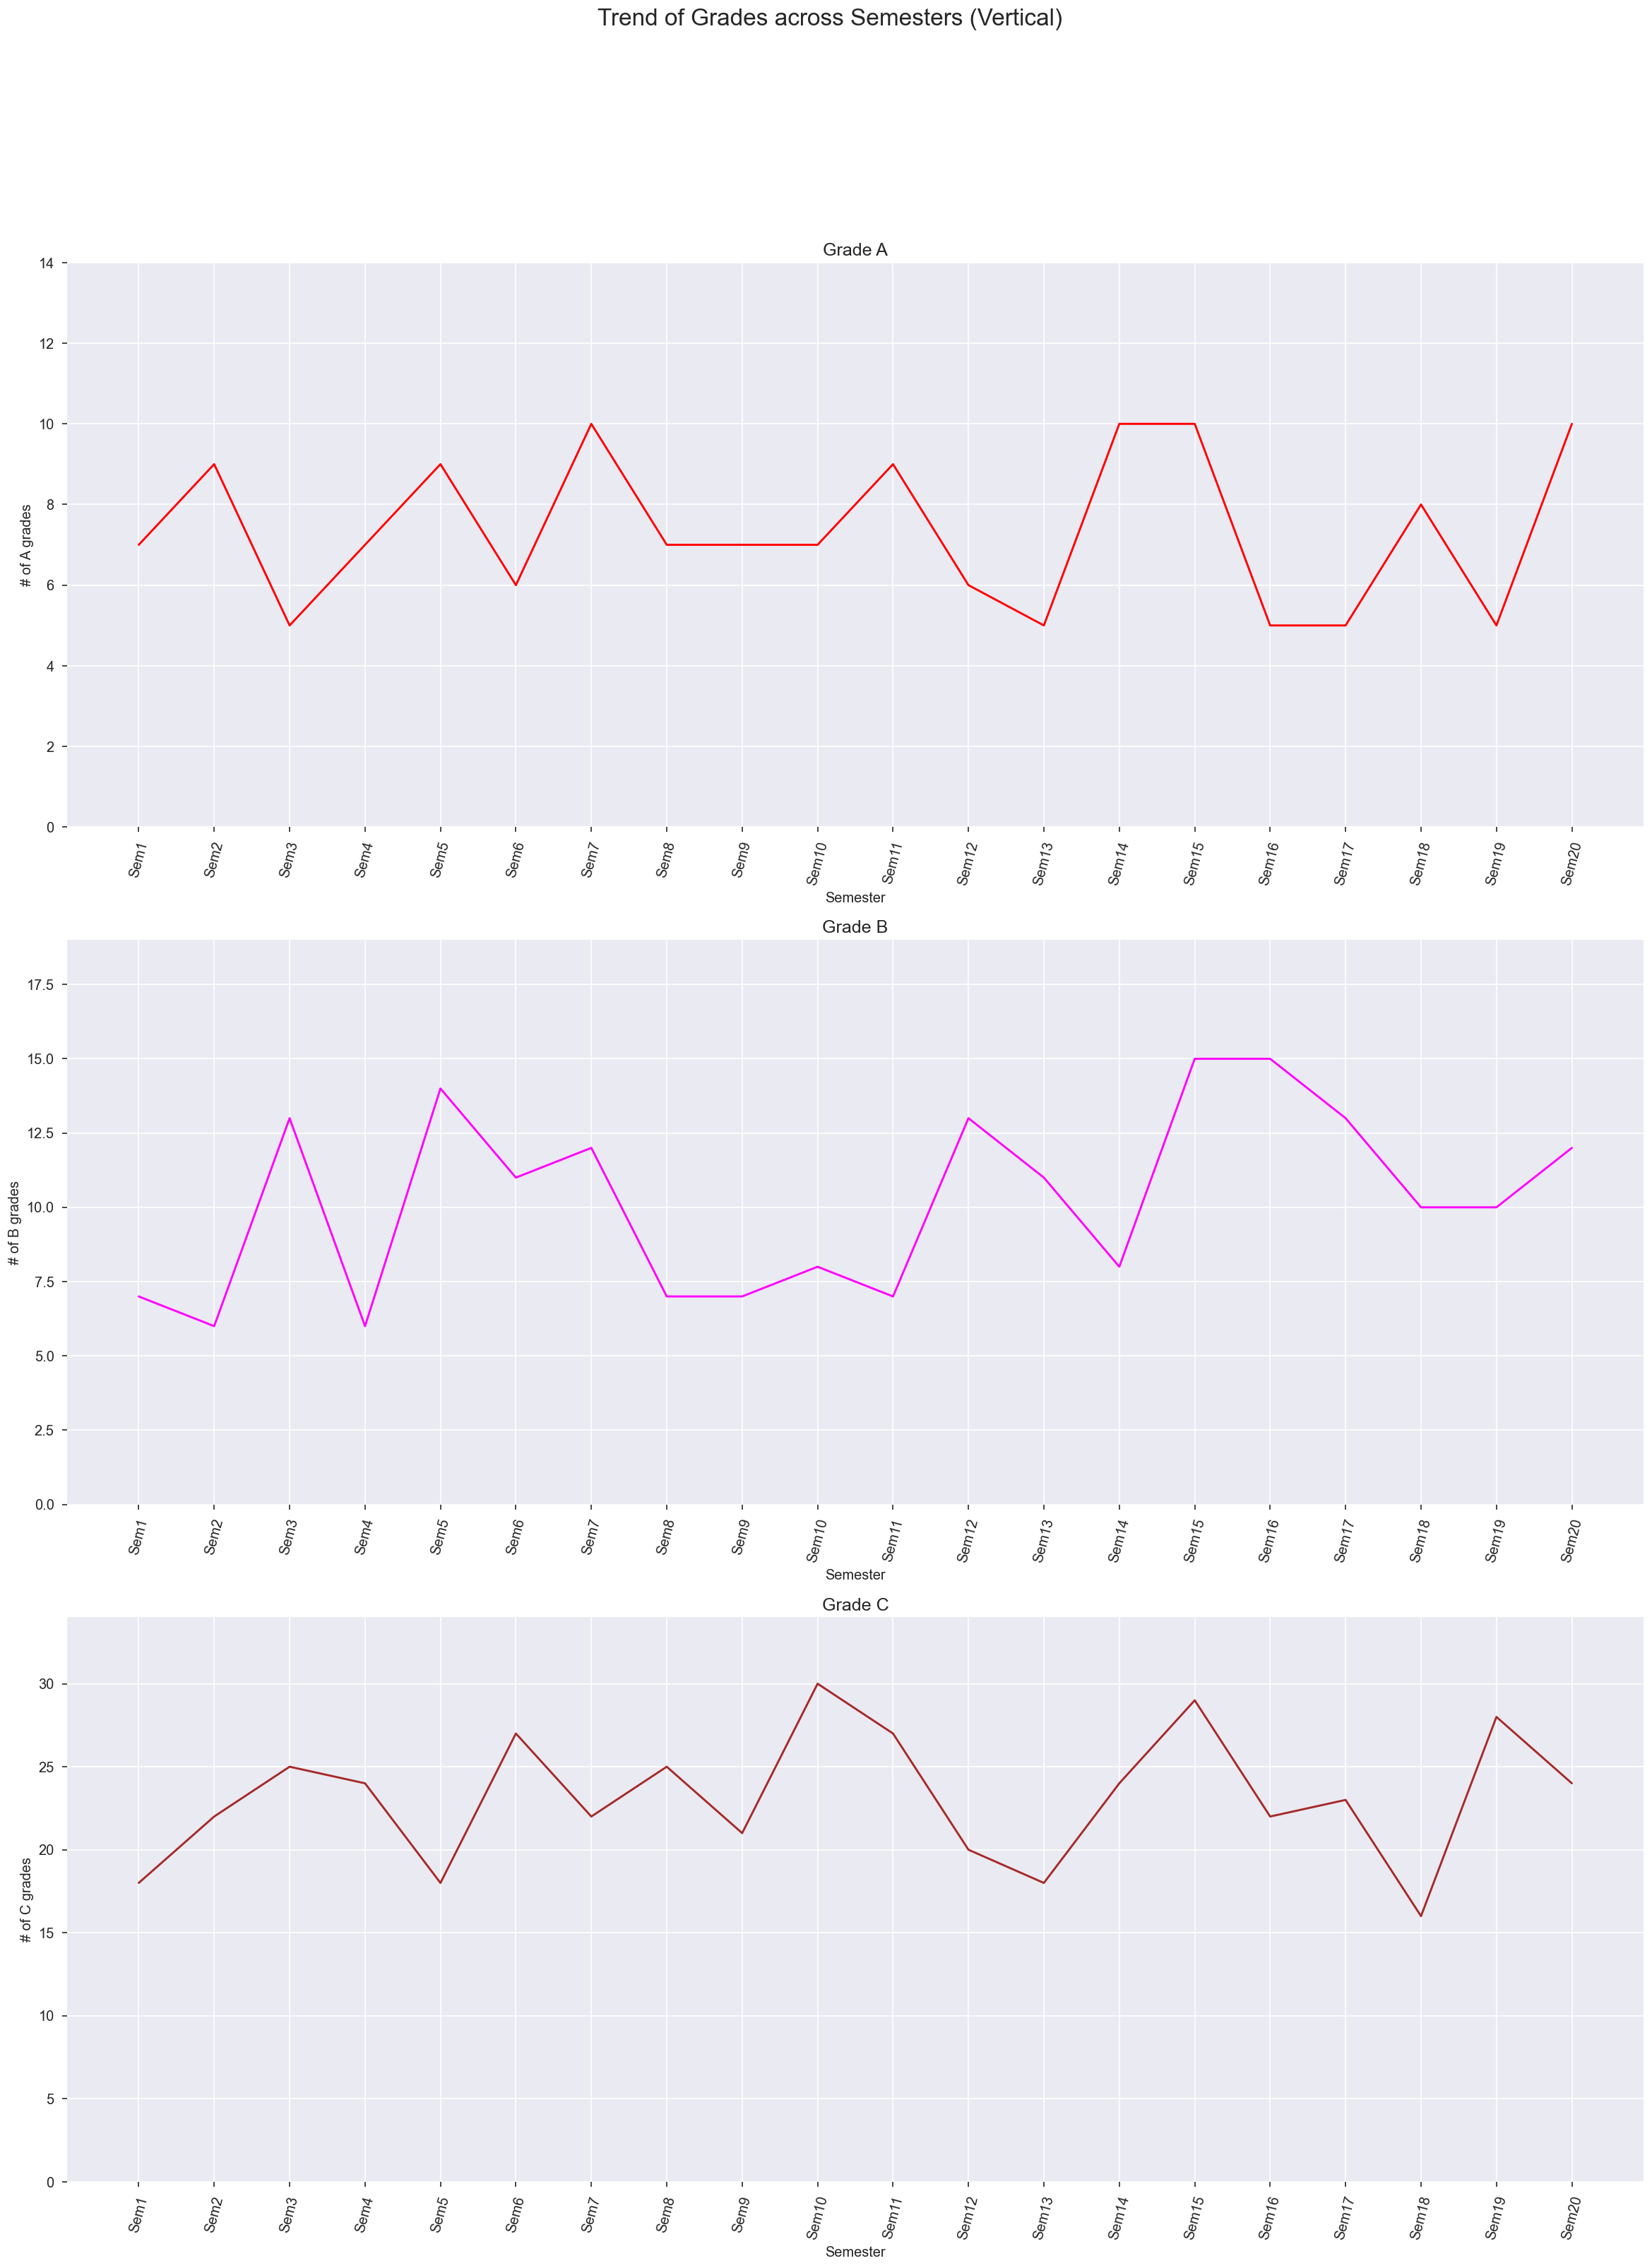

<Figure size 960x660 with 0 Axes>

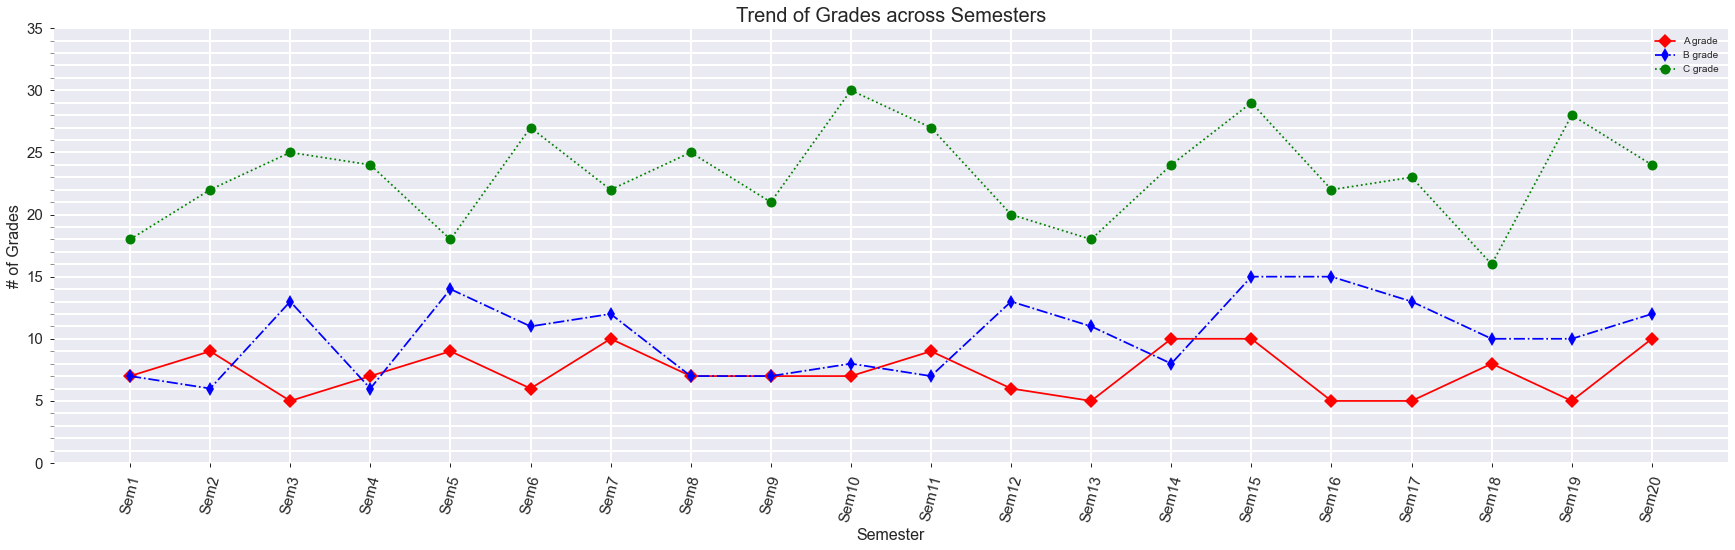

In [11]:
main()        #calling the main function